In [68]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])

In [70]:
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [71]:
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [72]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [73]:
# alchol seems to be larger than the other


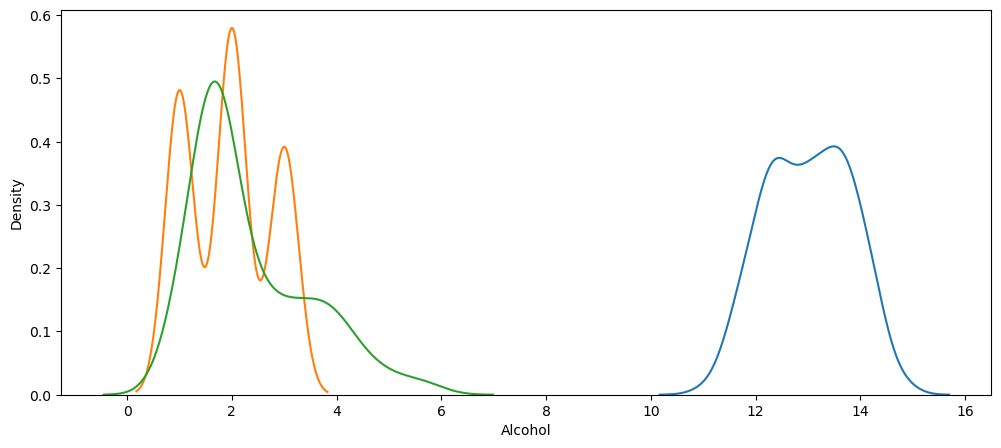

In [74]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 5))
sns.kdeplot(df['Alcohol'], ax = ax1)
sns.kdeplot(df['Class label'], ax = ax1)
sns.kdeplot(df['Malic acid'], ax = ax1)

plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

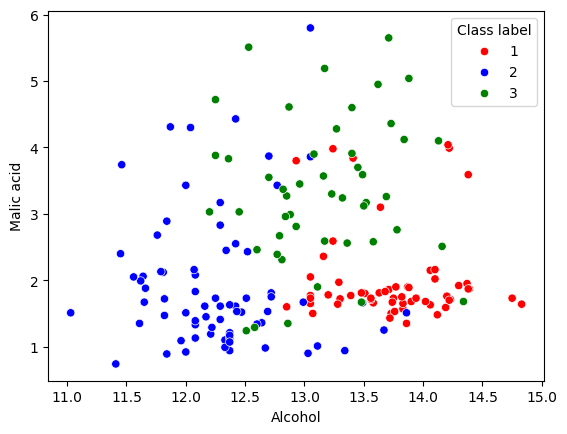

In [75]:
colors = {1:"red", 2:"blue", 3:"green"}
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'], hue = df['Class label'], palette = colors)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(df.drop('Class label'
                                                           , axis = 1),
                                                   df['Class label'],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [77]:
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [79]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


#### we get a numpy error from this now lets convert that to a dataframe

In [80]:
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)


In [81]:
X_test_scale.sample(5)

,Alcohol,Malic acid
43,0.422043,0.094538
8,0.327957,0.176471
22,0.594086,0.357143
28,0.196237,0.376050
16,0.733871,0.134454


In [82]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [83]:
np.round(X_train_scale.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [84]:
# if you look min is 0 and max is 1

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

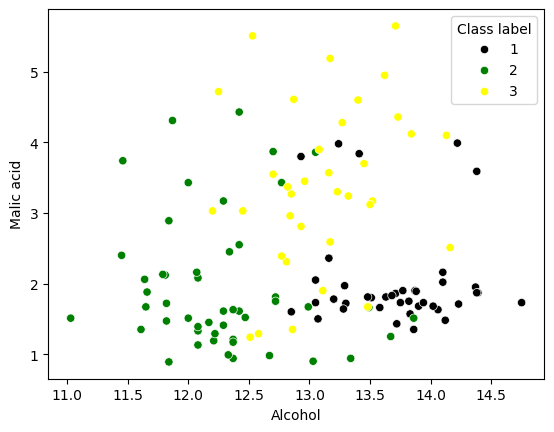

In [85]:
colors = ["black", "green", "yellow"]
sns.scatterplot(x = X_train['Alcohol'],y = X_train['Malic acid'], hue = df['Class label'], palette = colors)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

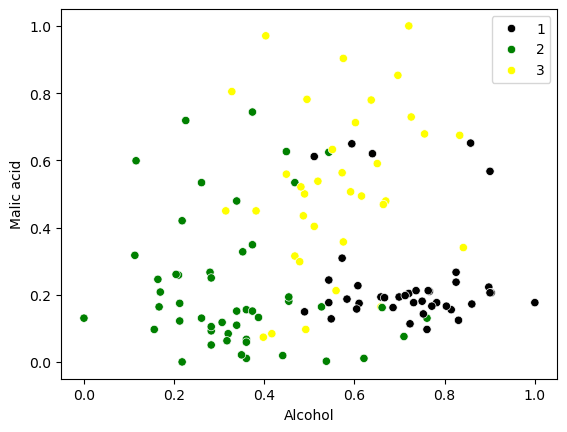

In [86]:
hue_values = y_train.astype(int) 

sns.scatterplot(
    x=X_train_scale['Alcohol'],
    y=X_train_scale['Malic acid'],
    hue=pd.Categorical(hue_values),  # categorical ensures proper mapping
    palette=colors
)

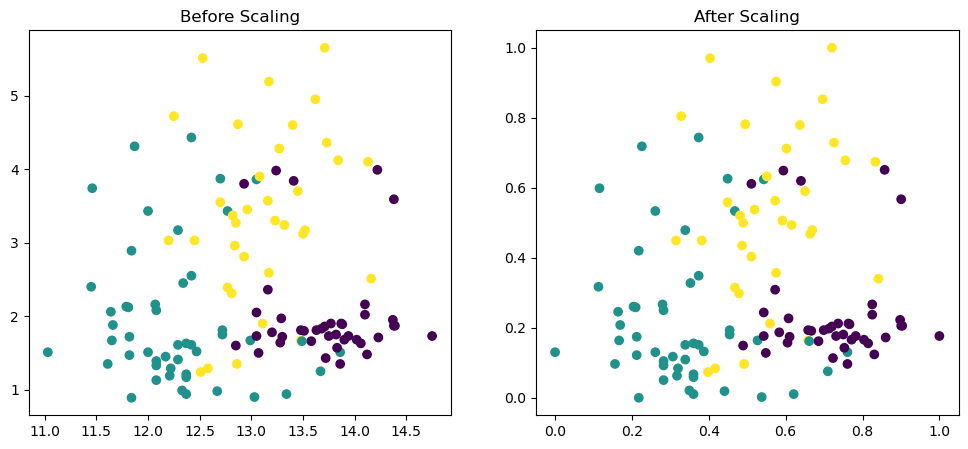

In [87]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scale['Alcohol'], X_train_scale['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

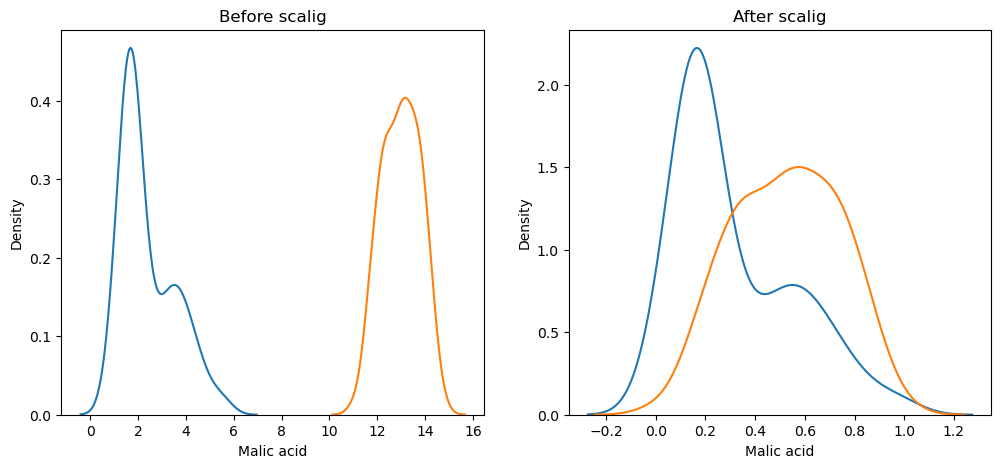

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before scalig")
sns.kdeplot(X_train['Malic acid'], ax = ax1)
sns.kdeplot(X_train['Alcohol'], ax = ax1)
ax2.set_title("After scalig")

sns.kdeplot(X_train_scale['Malic acid'], ax = ax2)
sns.kdeplot(X_train_scale['Alcohol'], ax = ax2)


plt.show()

In [94]:
# kde plot takes inference

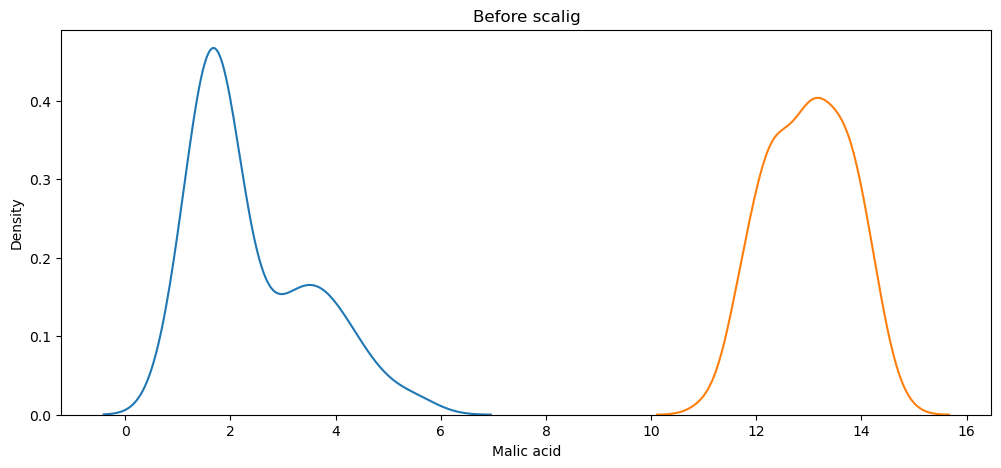

In [95]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 5))
ax1.set_title("Before scalig")
sns.kdeplot(X_train['Malic acid'], ax = ax1)
sns.kdeplot(X_train['Alcohol'], ax = ax1)


plt.show()

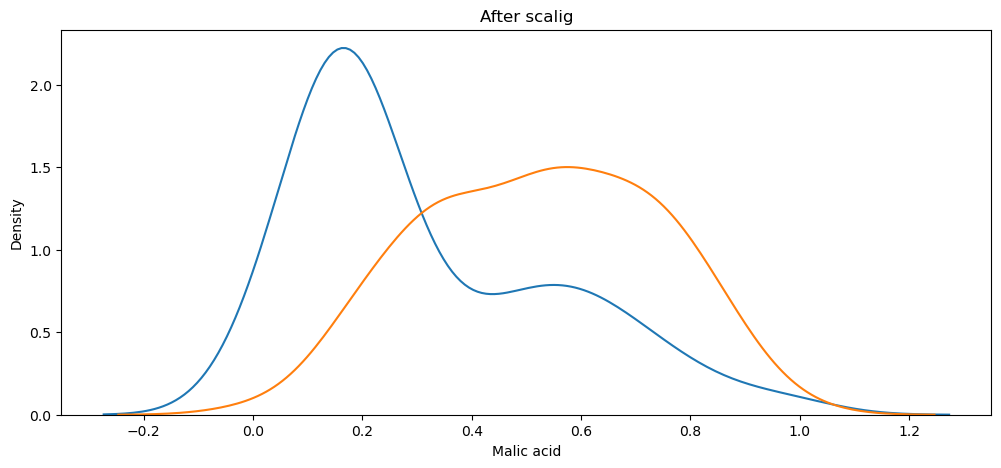

In [96]:
fig, (ax2) = plt.subplots(ncols=1, figsize=(12, 5))

ax2.set_title("After scalig")

sns.kdeplot(X_train_scale['Malic acid'], ax = ax2)
sns.kdeplot(X_train_scale['Alcohol'], ax = ax2)


plt.show()